In [0]:
pip install apache-airflow-providers-papermill

Python interpreter will be restarted.
  Using cached dill-0.3.7-py3-none-any.whl (115 kB)
  Using cached zipp-3.17.0-py3-none-any.whl (7.4 kB)
  Created wheel for cron-descriptor: filename=cron_descriptor-1.4.0-py3-none-any.whl size=49855 sha256=a997773bb30a77657d7fd75a6e912723c547bd2445d14e9fcd0e4f086ff0e715
  Stored in directory: /root/.cache/pip/wheels/91/41/27/d4b453bad5dec735b7572d4c5b064371ea66be40c042857e3a
  Created wheel for python-nvd3: filename=python_nvd3-0.15.0-py3-none-any.whl size=38166 sha256=4cef82a104fa45fd83a5f40305fecb2561023ba7279071046f7b4dc793353577
  Stored in directory: /root/.cache/pip/wheels/60/e8/21/19a3dcfe90e8895952857d42152663fafc5a90d87d3dfe5f58
  Created wheel for unicodecsv: filename=unicodecsv-0.14.1-py3-none-any.whl size=10765 sha256=2090030e9f9434c27717f8ff4e5de3d1fed5624a8c44adc31a80953a97bf8649
  Stored in directory: /root/.cache/pip/wheels/d8/c8/27/b237d3378d5c9ed25c2c63d9af1b3d5ccb99934f3dd030de87
Successfully built cron-descriptor python-nvd3 u

In [0]:
from pyspark.sql.functions import date_format, col, sum, round, when
import matplotlib.pyplot as plt
import pandas as pd

In [0]:
df_kaggle = spark.read.csv('/FileStore/tables/kaggle-1.csv', header=True)

In [0]:
df_vendas = df_kaggle.withColumn("created_at", date_format("created_at", "yyyy-MM-dd HH:mm:ss"))
df_vendas = df_vendas.withColumn("updated_at", date_format("updated_at", "yyyy-MM-dd HH:mm:ss"))
df_vendas = df_vendas.withColumn("price_y", col("price_y").cast("float"))
df_vendas = df_vendas.withColumn("price_x", col("price_x").cast("float"))   
df_vendas = df_vendas.withColumn("ano", date_format("created_at", "yyyy"))                          

In [0]:
df_total_transacao = df_vendas.groupBy("sale_id").agg(sum(col("price_x")).alias("valor_total_transacao"))
df_total_transacao = df_total_transacao.withColumn("valor_total_transacao", round(col("valor_total_transacao"), 2))

df_total_produto = df_vendas.groupBy("product_id").agg(sum(col("price_x")).alias("valor_total_produto"))
df_total_produto = df_total_produto.withColumn("valor_total_produto", round(col("valor_total_produto"), 2))

In [0]:
df_vendas_kaggle = df_vendas.join(df_total_transacao, (df_total_transacao.sale_id == df_vendas.sale_id), how='left')\
                            .join(df_total_produto, (df_total_produto.product_id == df_vendas.product_id), how='left')\
                            .drop(df_total_transacao.sale_id)\
                            .drop(df_total_produto.product_id)

In [0]:
# Criando categorias personalizadas com base no valor de venda
df_vendas_kaggle = df_vendas_kaggle.withColumn("categoria", when(col("price_x") > 1000, "Categoria Premium")
                                   .when((col("price_x") > 500) & (col("price_x") <= 1000), "Categoria Intermediária")
                                   .otherwise("Categoria Básica"))

In [0]:
display(df_vendas_kaggle.limit(400))

name,product,price_y,quantity,price_x,created_at,updated_at,email,mes,sale_id,valor_total_transacao,product_id,valor_total_produto,categoria
Mason Howell,Lang Club,866.694,3.8999,2433.8,1997-09-17 21:50:14,2007-02-15 19:34:06,jessica.cole@example.net,1997-09,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,8111.85,296,452838.32,Categoria Premium
Mason Howell,Lang Club,866.694,4.0,1196.58,1997-09-17 21:50:14,2007-02-15 19:34:06,jessica.cole@example.net,1997-09,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,8111.85,296,452838.32,Categoria Premium
Mason Howell,Lang Club,866.694,1.38452,1975.0,1997-09-17 21:50:14,2007-02-15 19:34:06,jessica.cole@example.net,1997-09,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,8111.85,296,452838.32,Categoria Premium
Mason Howell,Lang Club,866.694,2.225,119.526,1997-09-17 21:50:14,2007-02-15 19:34:06,jessica.cole@example.net,1997-09,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,8111.85,296,452838.32,Categoria Básica
Mason Howell,Lang Club,866.694,2.89,2386.94,1997-09-17 21:50:14,2007-02-15 19:34:06,jessica.cole@example.net,1997-09,442bc2f0-22d3-3c8a-9f71-0f9c16cee0b2,8111.85,296,452838.32,Categoria Premium
Miss Sheila Lehner Jr.,Lang Club,866.694,0.0451353,172.68,1999-08-19 03:22:44,2017-07-30 09:27:02,becker.beatrice@example.com,1999-08,77aa9946-a96d-373c-a227-d63bc1afcc90,4073.77,296,452838.32,Categoria Básica
Miss Sheila Lehner Jr.,Lang Club,866.694,3.0,959.38,1999-08-19 03:22:44,2017-07-30 09:27:02,becker.beatrice@example.com,1999-08,77aa9946-a96d-373c-a227-d63bc1afcc90,4073.77,296,452838.32,Categoria Intermediária
Miss Sheila Lehner Jr.,Lang Club,866.694,1.2,984.838,1999-08-19 03:22:44,2017-07-30 09:27:02,becker.beatrice@example.com,1999-08,77aa9946-a96d-373c-a227-d63bc1afcc90,4073.77,296,452838.32,Categoria Intermediária
Miss Sheila Lehner Jr.,Lang Club,866.694,1.71,1956.87,1999-08-19 03:22:44,2017-07-30 09:27:02,becker.beatrice@example.com,1999-08,77aa9946-a96d-373c-a227-d63bc1afcc90,4073.77,296,452838.32,Categoria Premium
Melyna Beahan II,Lang Club,866.694,4.81,2284.0,1985-03-23 00:59:07,2001-01-11 10:04:00,plittle@example.org,1985-03,4ef6db5d-574a-3515-8850-e78270702b3c,8684.59,296,452838.32,Categoria Premium


In [0]:
display(df_vendas.count())

44500

In [0]:
# Calculando a soma total de vendas por ano
df_vendas_ano = df_vendas.groupBy("ano").agg(sum(col("price_x")).alias("total_vendas_ano"))
df_vendas_ano = df_vendas_ano.withColumn("total_vendas_ano", round(col("total_vendas_ano"), 2))

In [0]:
display(df_vendas_ano.limit(400))

ano,total_vendas_ano
1987,1652671.0
2016,1770475.31
2012,1854443.66
2020,164189.14
1972,1739574.45
1988,1570515.31
2019,1852456.33
2017,1798445.61
1977,1639605.32
1971,1787949.56


In [0]:
df_vendas_kaggle.write.parquet("/FileStore/tables/vendas_kaggle.parquet")
df_vendas_kaggle.write.format("delta").mode("overwrite").save("/FileStore/tables/vendas_kaggle")

df_vendas_ano.write.parquet("/FileStore/tables/vendas_ano.parquet")
df_vendas_ano.write.format("delta").mode("overwrite").save("/FileStore/tables/vendas_ano")

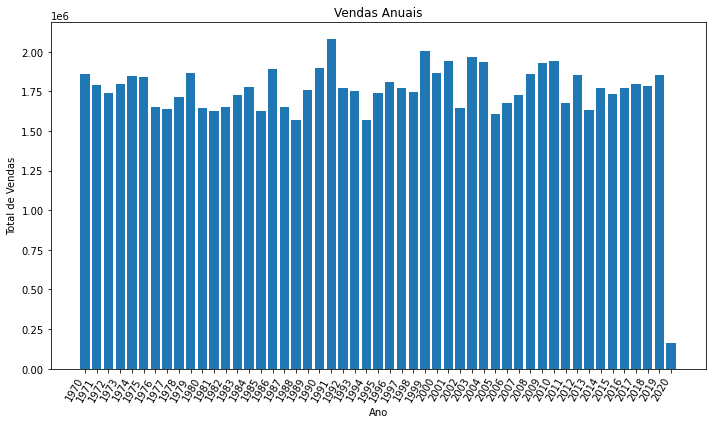

In [0]:
# Visualização: Gráfico de barras para vendas mensais
df_vendas_ano = df_vendas_ano.orderBy("ano")
vendas_ano_pd = df_vendas_ano.toPandas()
plt.figure(figsize=(10, 6))
plt.bar(vendas_ano_pd['ano'], vendas_ano_pd['total_vendas_ano'])
plt.title('Vendas Anuais')
plt.xlabel('Ano')
plt.ylabel('Total de Vendas')
plt.xticks(rotation=60, ha='right')
plt.tight_layout()
plt.show()

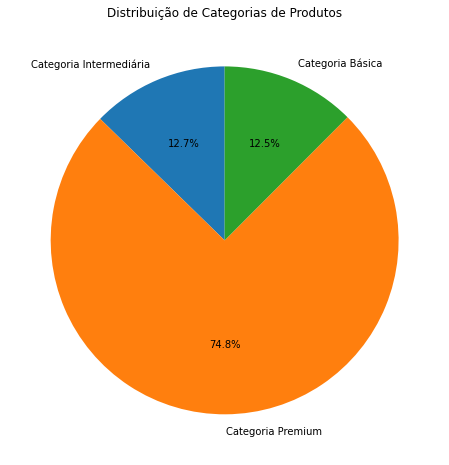

In [0]:
# Visualização: Gráfico de pizza para categorias de produtos
qtde_categoria = df_vendas_kaggle.groupBy("categoria").count().toPandas()
plt.figure(figsize=(8, 8))
plt.pie(qtde_categoria['count'], labels=qtde_categoria['categoria'], autopct='%1.1f%%', startangle=90)
plt.title('Distribuição de Categorias de Produtos')
plt.show()

## Criação do Ariflow para agendamento do Notebook

In [0]:
from airflow import DAG
from airflow.operators.papermill_operator import PapermillOperator
from datetime import datetime, timedelta

dag_name = 'atualiza_vendas_kaggle'

# Configuração padrão para o DAG
default_args = {
    'owner': 'Leonardo Andrade',
    'depends_on_past': False,
    'start_date': datetime(2024, 1, 21),
    'email_on_failure': False,
    'email_on_retry': False,
    'retries': 1,
    'retry_delay': timedelta(minutes=5),
}

dag = DAG(
    dag_name,
    default_args=default_args,
    description='DAG para atualização automática dos dados das vendas do Kaggle',
    # schedule_interval='*/30 * * * *',
    schedule_interval='@daily',
)

notebook_path = '/Users/landrade.investimentos@hotmail.com/Entrevistas/ntb_vendas_kaggle.ipynb'

execute_notebook = PapermillOperator(
    task_id='execute_notebook',
    input_nb=notebook_path,
    output_nb=notebook_path,
    dag=dag,
)

execute_notebook

if __name__ == "__main__":
    dag.cli()